In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv("train_comp.csv")
# test = pd.read_csv("test_comp.csv")
# sample = pd.read_csv("sample_submission.csv")

train.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,36,189,82,26,101,41.0,150
1,female,64,163,60,8,85,39.7,34
2,female,51,161,64,7,84,39.8,29
3,male,20,192,90,25,105,40.7,140
4,female,38,166,61,25,102,40.6,146


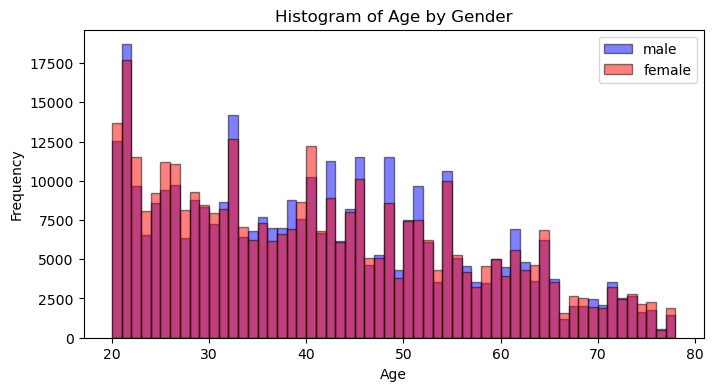

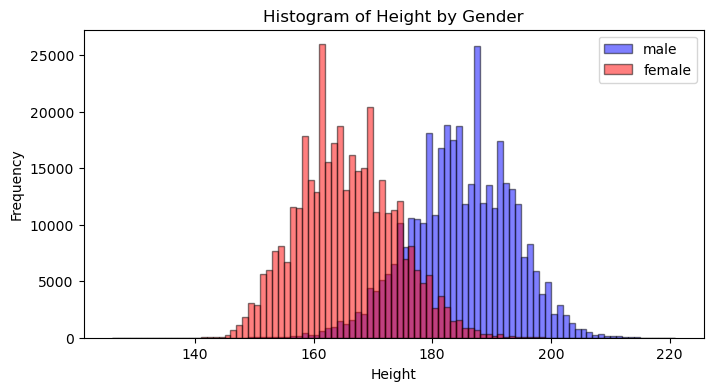

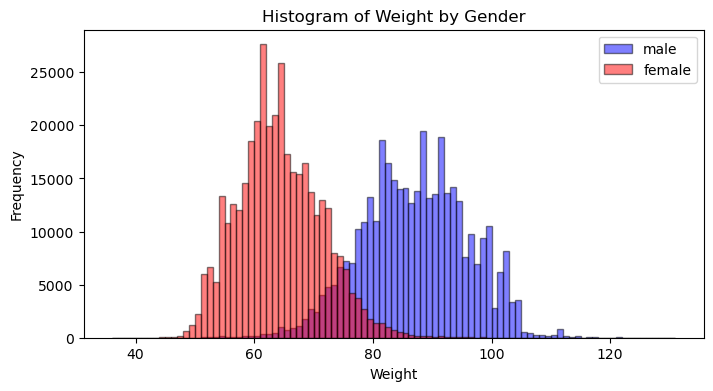

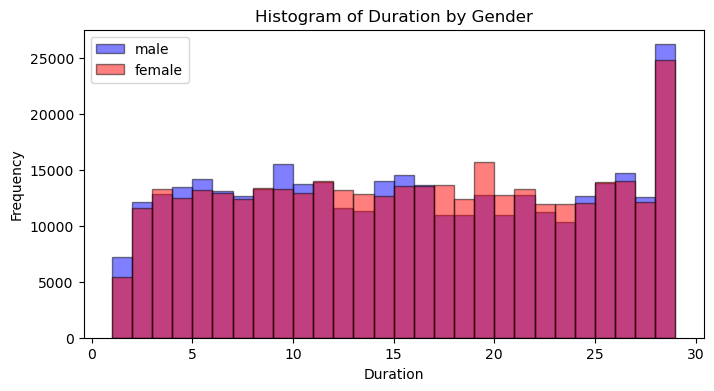

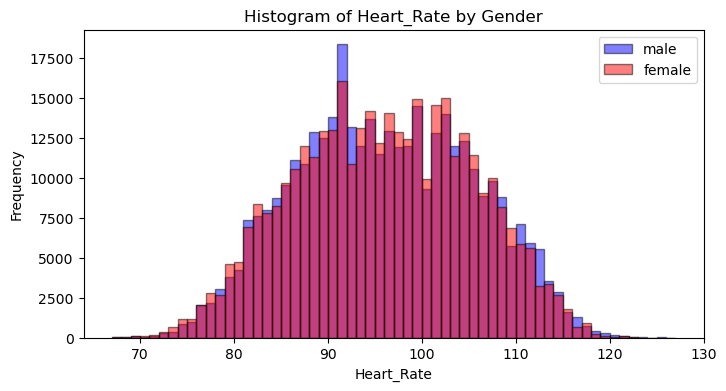

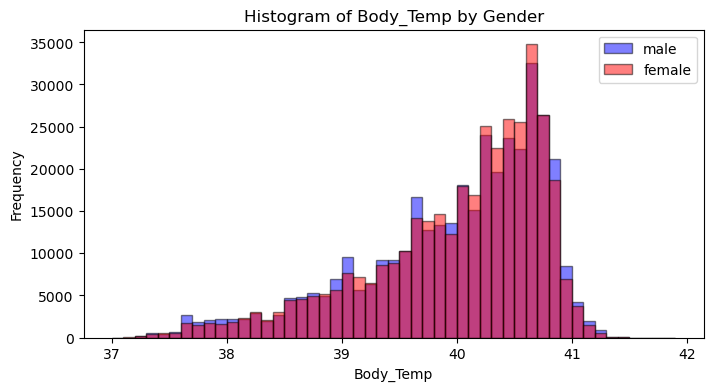

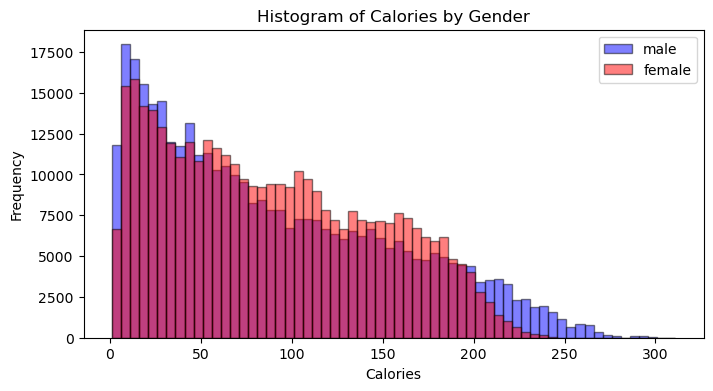

In [15]:
# bin dictionary
bin_dict = {
    'Age': range(np.min(train['Age']), np.max(train['Age']), 1),
    'Height': range(np.min(train['Height']), np.max(train['Height']), 1),
    'Weight': range(np.min(train['Weight']), np.max(train['Weight']), 1),
    'Duration': range(np.min(train['Duration']), np.max(train['Duration']), 1),
    'Heart_Rate': range(np.min(train['Heart_Rate']), np.max(train['Heart_Rate']), 1),
    'Body_Temp': np.arange(np.floor(np.min(train['Body_Temp'])), np.ceil(np.max(train['Body_Temp'])), 0.1),
    'Calories': range(np.min(train['Calories']), np.max(train['Calories']), 5)
}

# Assign different colors for each sex
colors = {'male': 'blue', 'female': 'red'}

for column in train.columns:
    if pd.api.types.is_numeric_dtype(train[column]):
        plt.figure(figsize=(8, 4))

        bins = bin_dict.get(column)

        # Plot histogram for each gender
        for gender in train['Sex'].dropna().unique():
            subset = train[train['Sex'] == gender]
            plt.hist(subset[column].dropna(), bins=bins, alpha=0.5, label=gender, color=colors.get(gender), edgecolor='black')

        plt.title(f'Histogram of {column} by Gender')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.legend()
        plt.grid(False)
        # plt.tight_layout()
        plt.show()

In [18]:
train.corr(numeric_only=True)

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Age,1.000000,0.011975,0.073690,0.015656,0.017037,0.030275,0.145683
Height,0.011975,1.000000,0.957967,-0.029936,-0.013234,-0.034641,-0.004026
Weight,0.073690,0.957967,1.000000,-0.020845,-0.002384,-0.023717,0.015863
Duration,0.015656,-0.029936,-0.020845,1.000000,0.875327,0.903066,0.959908
Heart_Rate,0.017037,-0.013234,-0.002384,0.875327,1.000000,0.795972,0.908748
Body_Temp,0.030275,-0.034641,-0.023717,0.903066,0.795972,1.000000,0.828671
Calories,0.145683,-0.004026,0.015863,0.959908,0.908748,0.828671,1.000000


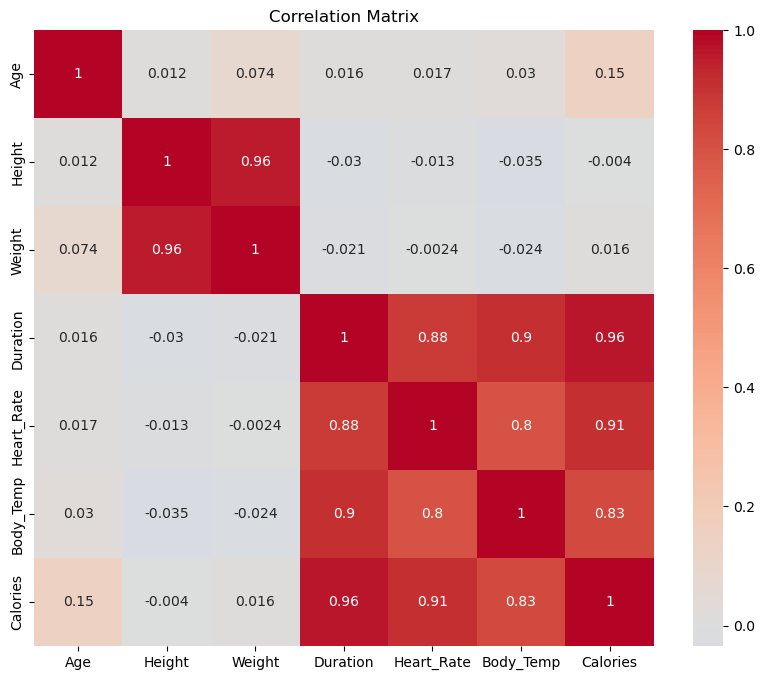

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()